In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [8]:
def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

def metro(num_config):
    niter=num_config
    
    state=0*np.random.random_sample((points,)) #### Initial state
    
    for m in range(niter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass

def thermalization(num_iter):
    tniter=num_iter 
    num_accept=0
    state=0*np.random.random_sample((points,))
    avg_pos=0*np.random.random_sample((tniter+1,))
    avg_pos2=0*np.random.random_sample((tniter+1,))

    for h in state:
            avg_pos[0]=avg_pos[0]+h
            avg_pos2[0]=avg_pos2[0]+h**2

    for m in range(tniter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

        for h in state:
            avg_pos[m+1]=avg_pos[m+1]+h
            avg_pos2[m+1]=avg_pos2[m+1]+h**2

    avg_pos=avg_pos/points
    avg_pos2=avg_pos2/points
    print("Acceptance ratio :", num_accept/(tniter*points), "\n The acceptance ratio needs to be around 0.5. \n If it's too low try reducing 'step', and vv if it's too high. ")
    
    
    config=np.arange(tniter+1)

    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number. Tuned axis')
    plt.plot(config, avg_pos2)
    plt.axis([0,400,0,max(avg_pos2)]) ####May need to tune x-axis
    plt.show()
    
    
def data(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    
    f=open('data'+name+'.txt' , 'w')
    
    
    state=1*np.random.random_sample((points,)) #### Initial state
    avg_pos=0*np.random.random_sample((niter+1,))
    avg_pos2=0*np.random.random_sample((niter+1,))
    
    for h in state:
        f.write(str(h) + '\n')
    
    for m in range(niter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                else:
                    pass
        
        for h in state:
            
            f.write(str(h) + '\n')
        
        
        
    
    f.close()

def corr(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    
    f=open('data'+name+'.txt' , 'r')
    data=f.readlines()
    f.close()
    
    corr=[]
    
    for n in range(corrt):
        
        sum1=0
        sum2=0
        for m in range(points):
            sum1=sum1+(eval(data[m])*eval(data[m+((n+1)*points)]))
            
        corr=np.append(corr,sum1/points)
    corr_time=np.arange(corrt)
    corr=corr/(max(corr))
    
    plt.figure(1)
    plt.xlabel('Correlation time')
    plt.ylabel('Correlation')
    plt.title('Correlation graph')
    plt.plot(corr_time, corr)
    plt.show()
    
           
    
    
def corr1(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    
    
    f=open('data'+name+'.txt' , 'r')
    avg_pos=[]
    avg_pos2=[]
    
    for n in range(niter):
        
        sum1=0
        sum2=0
        for m in range(points):
            p=eval(f.readline())
            sum1 = sum1 + p
            sum2 = sum2 + p**2
        
        avg_pos=np.append(avg_pos,sum1/points)
        avg_pos2=np.append(avg_pos2,sum2/points)
    
    config=np.arange(niter)
            
    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.show()       
            
    
    


In [11]:
mu=1.41 #### spring constant
m=0.5 #### mass
a=0.1 #### lattice spacing

#niter=int(10/a)
tniter=400 #### Number of iterations for thermalization
step=1 #### metropolis step
points=10 ####Number of lattice points

c1=m/a
c2=(a*(mu**2))/2

corrt = 100 #### correlation time

In [110]:
data(1.41,0.5,0.1,1000,100) #### spring_const,mass,lattice_spacing,num_config,num_lat_points

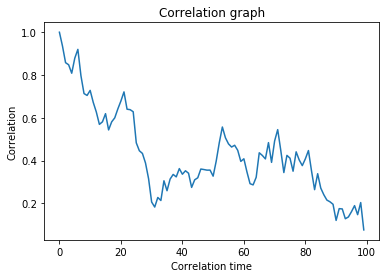

In [113]:
corr(1.41,0.5,0.1,1000,100) #### spring_const,mass,lattice_spacing,num_config,num_lat_points

Acceptance ratio : 0.4685 
 The acceptance ratio needs to be around 0.5. 
 If it's too low try reducing 'step', and vv if it's too high. 


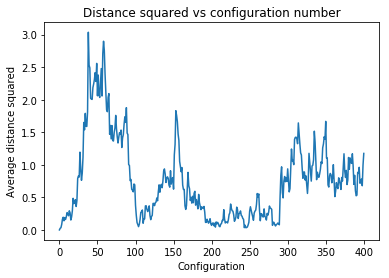

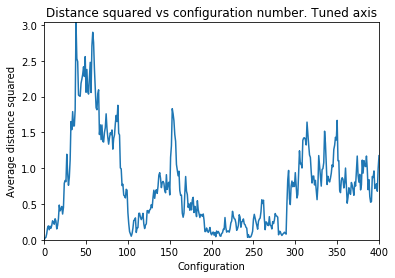

In [12]:
thermalization(tniter)

In [ ]:
time=np.arange(niter+1)
print(time.size)
print(avg_pos.size)

plt.figure(1)
plt.xlabel('Configuration')
plt.ylabel('Average Position')
plt.title('Position vs configuration number')
plt.plot(time, avg_pos)
plt.show()

plt.figure(2)
plt.xlabel('Configuration')
plt.ylabel('Average distance squared')
plt.title('Distance squared vs configuration number')
plt.plot(time, avg_pos2)
plt.show()

plt.figure(3)
plt.xlabel('Configuration')
plt.ylabel('Energy')
plt.title('Average energy')
plt.plot(time, (mu**2)*avg_pos2)
plt.show()